# <b>Bird Species Identification Tool</b>
By Raymond Baartmans

## <u>How to Use</u>
<small>(Before using this tool, you should have already followed the instructions to open the notebook in Jupyter-Lab, in the README file located in the project folder. If you have not, please read and follow those instructions first)</small>

1. Upload any images you'd like the model to predict to the 'images/' directory in the project folder that this notebook file is in. A few images have already been provided for you.
2. Click the "Run All Cells" button on the menu bar at the top of the notebook, which looks like something this: ▶▶. The code cells of the notebook will execute.
3. Once the program is finished setting up the model, it will reach the final code block and show an input box, prompting you to enter the filename of an image you uploaded to the images directory. Follow the command line prompts to use the tool.
4. Enjoy!

## <u>Overview</u>
This tool uses machine learning to accurately identify the species of a bird in an image. Read this notebook to see how it was trained, and how it works.

### Architecture
The model implements a convolutional neural network using the InceptionV3 architecture and is trained on images of 525 different bird species to predict the species of bird in a photograph.

### Libraries Used
This project uses the following external libraries:
- Tensorflow, Keras for building the ML model
- Numpy for saving model history
- Matplotlib for graphing
- Pandas for creating dataframes

<small>See the requirements.txt file for a full list of libraries used.</small>


## <u>Data</u>
The dataset used for this can be found on Kaggle: https://www.kaggle.com/datasets/gpiosenka/100-bird-species. The dataset contains images (each of 224x224 size) of 525 different bird species. A benefit of using Kaggle is that the data comes pre-processed, so no labeling or grouping needs to be done. Below is an example image of an albatross from the training dataset.

![Albatross](images/002.jpg)

### Data Exploration

<p id="runn">Development of the tool started by connecting to the dataset.</p>

In [1]:
import os

# Locations for training, testing, and validation data
DIR = "Data/"
TRAIN_DIR = DIR + "train/"
TEST_DIR = DIR + "test/"
VALID_DIR = DIR + "valid/"

# Get a sorted list of all bird species in the dataset
BIRD_CLASSES = sorted(os.listdir(TEST_DIR))


# Check if images are loaded in train and validation directories
train_loaded = os.path.exists(TRAIN_DIR)
valid_loaded = os.path.exists(VALID_DIR)

# List the names of all bird species in the dataset.
print(str(len(BIRD_CLASSES)) + " total bird species.")
print(BIRD_CLASSES)

525 total bird species.
['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE 

Look through the above list of bird species to get an idea of what species are represented in the dataset. 

In order to better visualize the training data, we graphed the top 10 most and least common bird species in the dataset.

In [2]:
import matplotlib.pyplot as pyplot
from pathlib import Path
import pandas as pd

#if training data is in project directory, run this code. Training data is not included in project by default due to file size limits.
if train_loaded:
    image_dir = Path(TRAIN_DIR)
    # Get filepaths and labels
    filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.png'))

    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    image_df = pd.concat([filepaths, labels], axis=1)
    # Get the 10 most and least common species
    top_10 = image_df['Label'].value_counts()[:10]
    bottom_10 = image_df['Label'].value_counts()[-10:]

    # create bar graphs
    fig, (ax1, ax2) = pyplot.subplots(2)
    fig.suptitle('10 most and least common birds in dataset', fontsize='12')
    ax1s = ax1.bar(top_10.index, top_10.values)
    ax1.set_title('Most common birds in dataset', fontsize='8')
    ax1.set_xticklabels(top_10.index, rotation=45, ha='right', fontsize='6')
    ax2s = ax2.bar(bottom_10.index, bottom_10.values)
    ax2.set_title('Least common birds in dataset', fontsize='8')
    ax2.set_xticklabels(bottom_10.index, rotation=45, ha='right', fontsize='6')
    ax1.bar_label(ax1s, fmt='%.2f', fontsize=6)
    ax2.bar_label(ax2s, fmt='%.2f', fontsize=6)
    pyplot.tight_layout()


<b>(NOTE: Due to the size of the dataset, the training image data was not included in the project files. A static image of the graphs that are generated by this code block are provided below, but if you'd like to run the code and generate the graphs using this notebook, you must download the full dataset from the link provided above, and move the folder titled "train" into the "Data/" directory)</b>

![GRAPHS](graphs/datagraph.png)

Based on the graphs above, the most common bird in the dataset is the Rufous Treepie, represented in 526 images, followed by the House Finch (496 images) and the Ovenbird (466 images). On the other hand, there are a large amount of birds with only 260 images in the dataset. Based on this data, we can hypothesize that the model will be more accurate at recognizing well-represented birds such as the Rufous Trepe as opposed to minimally represented birds such as the Snowy Plover. 

## <u>Model</u>
A convolutional neural network is best suited for the task of image classification, due to its ability to extract and identify complex pattens in images. The model we are using is the InceptionV3 architecture, which is designed specifically for image classification tasks. We compile it with the Adam optimizer.

In [3]:
import tensorflow as tf
from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D, Dense, Input
from keras import Model
from keras.optimizers import Adam

# InceptionV3 architecture - good for image classification
base_model = InceptionV3(include_top=False,)
base_model.trainable = False

def create_model():
    # Create input layer with correct shape, images are 224x224 pixels
    inputs = Input(shape=(224, 224, 3), name="input-layer")
    x = base_model(inputs)
    x = GlobalAveragePooling2D(
        name="global_average_pooling_layer")(x)
    
    # Create output layer
    outputs = Dense(
        525, activation="softmax", name="output-layer")(x)
    model = Model(inputs, outputs)

    #compile model with adam optimization algorithm
    model.compile(loss="categorical_crossentropy",
                  optimizer=Adam(learning_rate=0.01),
                  metrics=["accuracy"],)
    model.summary()
    return model

model = create_model()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 global_average_pooling_laye  (None, 2048)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output-layer (Dense)        (None, 525)               1075725   
                                                                 
Total params: 22,878,509
Trainable params: 1,075,725
Non-trainable params: 21,802,784
_________________________________________________________________


## <u>Training</u>

We can view information about our machine learning model using the above summary. The next step in the process is to train the model. 


In [4]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

TEST_GEN = ImageDataGenerator(rescale=1./255)
TEST_DATA = TEST_GEN.flow_from_directory(
    TEST_DIR, batch_size=32, target_size=(224, 224), class_mode="categorical")

if train_loaded and valid_loaded:
    # Create img data generators
    TRAIN_GEN = ImageDataGenerator(rescale=1./255)
    VALID_GEN = ImageDataGenerator(rescale=1./255)

    # Set up training data for the model
    TRAIN_DATA = TRAIN_GEN.flow_from_directory(
        TRAIN_DIR, batch_size=32, target_size=(224, 224), class_mode="categorical")

    VALID_DATA = VALID_GEN.flow_from_directory(
        TRAIN_DIR, batch_size=32, target_size=(224, 224), class_mode="categorical")

# Number of epochs for initial training
INITIAL_EPOCHS = 10

# configure directories for saving checkpoints during training
CHECKPOINT_DIR = "training/"
CHECKPOINT_PATH = CHECKPOINT_DIR + "cp.ckpt"
CHECKPOINT_CALLBACK = tf.keras.callbacks.ModelCheckpoint(
    filepath=CHECKPOINT_PATH, save_weights_only=True, verbose=1)


def train_model(model: Model):
    if train_loaded:
        # train model and save the training history
        history = model.fit(TRAIN_DATA, epochs=INITIAL_EPOCHS, steps_per_epoch=len(TRAIN_DATA),
                            validation_data=VALID_DATA, validation_steps=int(0.25*len(VALID_DATA)), callbacks=[CHECKPOINT_CALLBACK])
        np.save('history/training_history.npy', history.history)
        return history.history

def load_model(model: Model):
    # for loading an already-trained model
    model.load_weights(CHECKPOINT_PATH).expect_partial()
    return model

def load_training_history():
    # for loading the history of an already-trained model
    history = np.load('history/training_history.npy', allow_pickle='TRUE').item()
    return history

# if model was already trained, load weights, otherwise train model
if os.path.exists(CHECKPOINT_DIR):
    model = load_model(model)
    history = load_training_history()
else:
    history = train_model(model)

Found 2625 images belonging to 525 classes.


## <u>Training Results</u>
Using matplotlib, we can create graphs to visualize how the model improved over the course of its training.

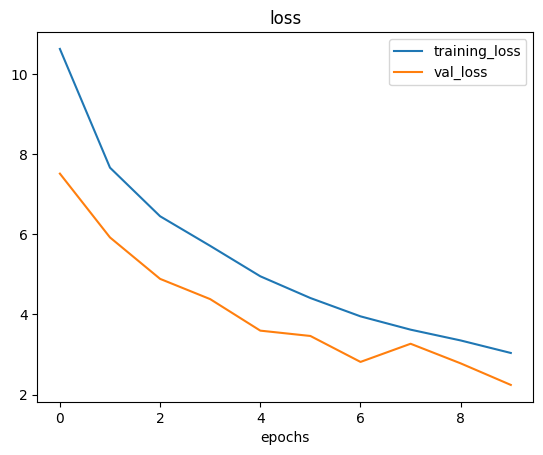

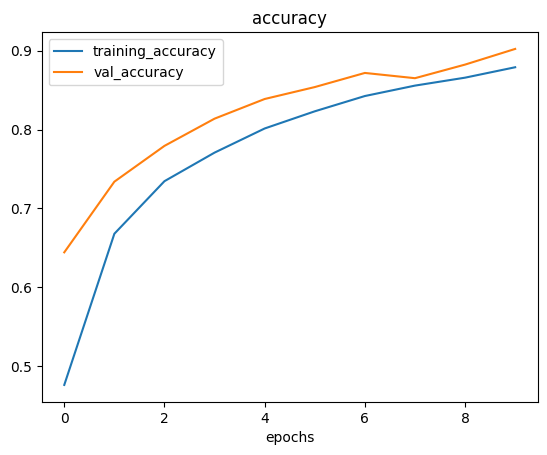

In [5]:
def plot_curves(history):
    loss = history["loss"]
    val_loss = history["val_loss"]
    accuracy = history["accuracy"]
    val_accuracy = history["val_accuracy"]
    epochs = range(len(history["loss"]))

    # plot loss
    pyplot.plot(epochs, loss, label="training_loss")
    pyplot.plot(epochs, val_loss, label="val_loss")
    pyplot.title("loss")
    pyplot.xlabel("epochs")
    pyplot.legend()

    # plot accuracy
    pyplot.figure()
    pyplot.plot(epochs, accuracy, label="training_accuracy")
    pyplot.plot(epochs, val_accuracy, label="val_accuracy")
    pyplot.title("accuracy")
    pyplot.xlabel("epochs")
    pyplot.legend()

plot_curves(history)

Examining these graphs, we can see that there is a negative correlation between accuracy and loss, as expected. The model trained for this tool experienced the majority of its improvement from epochs 0-4, where it jumped from around 20% accuracy to ~80% accuracy, and then began to gradually slow down, until reaching close to 90% accuracy by the 10th epoch. Interestingly, the model experienced a slight dip in validation accuracy and increase in validation loss between epochs 6 and 7.


### <u>Tuning the model</u>
After the initial training, we can begin to fine-tune the model to the dataset. To do this, we unfreeze the last ten layers of the base model, and then recompile the model with a smaller learning rate.

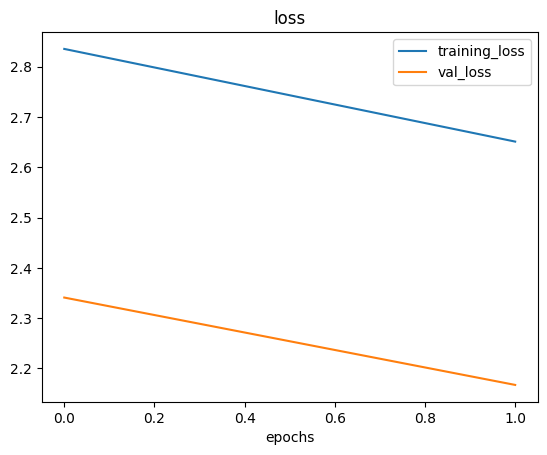

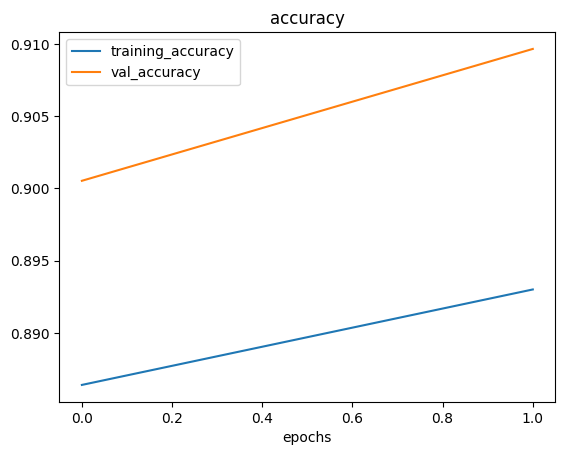

In [6]:
def tune_model(model: tf.keras.Model, tune_epochs):
    if train_loaded:
        #unfreeze the last 10 layers of the base model
        base_model.trainable = True
        for layer in base_model.layers[:-10]:
            layer.trainable = False

        #recompile model
        model.compile(loss="categorical_crossentropy",
                    optimizer=Adam(learning_rate=0.001),
                    metrics=["accuracy"],)
        
        new_epochs = INITIAL_EPOCHS + tune_epochs
        tune_history = model.fit(TRAIN_DATA, epochs=new_epochs, steps_per_epoch=len(TRAIN_DATA),
                validation_data=VALID_DATA, validation_steps=int(0.25*len(VALID_DATA)), callbacks=[CHECKPOINT_CALLBACK], initial_epoch=INITIAL_EPOCHS - 1)
        np.save('history/tuning_history.npy', tune_history.history)
        return tune_history.history

def load_tune_history():
    history = np.load('history/tuning_history.npy', allow_pickle='TRUE').item()
    return history

if os.path.exists('history/tuning_history.npy'):
    tune_history = load_tune_history()
else:
    tune_history = tune_model(model, 2)

plot_curves(tune_history)

As we can see, tuning raised the model's training and validation accuracy by 2 points.

### <u id="run">Using the Model</u>
Now, for the fun part. If you'd like to test this model on your own bird images, follow these steps:
1. Upload your images to the 'images/' directory in the same folder that this notebook file is in.
2. Run all the code blocks in this notebook.
3. Once the program is finished setting up the model, it will reach this final code block and prompt you to enter the filename of an image you uploaded to the images directory. Follow those prompts.
4. Enjoy!

In [7]:
from keras.applications.inception_v3 import preprocess_input

# for converting the model's prediction into a bird name rather than an array of numbers :)
def get_bird_name(index):
    return BIRD_CLASSES[index]

def classify(model: tf.keras.Model, img_path):
    # load image
    img = tf.keras.preprocessing.image.load_img(
        img_path, target_size=(224, 224))
    # image needs to be converted into batch for preprocessing
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(
        img_batch)
    # make prediction
    prediction = model.predict(img_preprocessed).tolist()[0]
    return get_bird_name(prediction.index(max(prediction)))

# User can put bird image files into the "images/" directory and begin making predictions
done = False
while not done:
    next_input = input("Enter the name of the file you would like to predict. It must be in the 'images/' directory.\nYou can also enter 't' to test the model on a large set of images or 'q' to quit.\n")
    if next_input == 't':
        # test the model
        model.evaluate(TEST_DATA)
    if next_input == 'q':
        done = True
    if next_input != 'q' and next_input != 't':
        f = "images/" + next_input
        if os.path.exists(f):
            print("Making prediction for " + f + "...")
            prediction = classify(model, f)
            print("Prediction: " + prediction)
        else:
            print("The file: " + f + " does not exist.")

Enter the name of the file you would like to predict. It must be in the 'images/' directory.
You can also enter 't' to test the model on a large set of images or 'q' to quit.
 t


83/83 [==============================] - 12s 87ms/step - loss: 5.6970 - accuracy: 0.8442


Enter the name of the file you would like to predict. It must be in the 'images/' directory.
You can also enter 't' to test the model on a large set of images or 'q' to quit.
 bald_eagle.jpg


Making prediction for images/bald_eagle.jpg...
1/1 [==============================] - 1s 908ms/step
Prediction: BALD EAGLE


Enter the name of the file you would like to predict. It must be in the 'images/' directory.
You can also enter 't' to test the model on a large set of images or 'q' to quit.
 roseate_spoonbill.jpeg


Making prediction for images/roseate_spoonbill.jpeg...
1/1 [==============================] - 0s 25ms/step
Prediction: ROSEATE SPOONBILL


Enter the name of the file you would like to predict. It must be in the 'images/' directory.
You can also enter 't' to test the model on a large set of images or 'q' to quit.
 q


By selecting the test option, we can see that our model has an accuracy of 84% on the test dataset.